<a href="https://colab.research.google.com/github/sandragpuga/PUCRJ-MVP-analiseExploratoria/blob/main/MVP_SandraPuga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sandra G. Puga**

# Fatores de desempenho do aluno

Student Performance Factors

Disponível em www.kaggle.com/Datasets




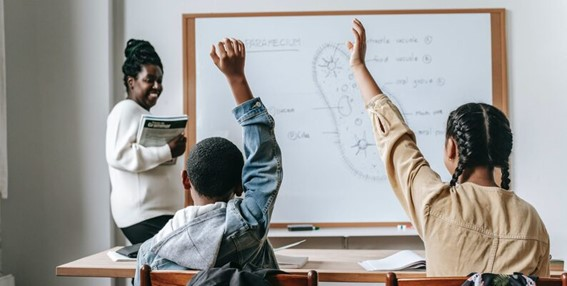

### **Sobre o conjunto de dados**

Este conjunto de dados fornece uma visão geral abrangente de vários fatores que afetam o desempenho dos alunos em exames. Inclui informações sobre hábitos de estudo, frequência, envolvimento dos pais e outros aspectos que influenciam o sucesso acadêmico.

### **Atributos**


*   **Horas_Estudadas:**	Número de horas gastas estudando por semana.

*   **Presença:** 	Porcentagem de aulas assistidas.


*   **Envolvimento Parental:**	Nível de envolvimento dos pais na educação do aluno (baixo, médio, alto).

*   **Acesso_a_Recursos:**	Disponibilidade de recursos
Item da lista educacionais (Baixa, Média, Alta).
*   **Atividades_extracurriculares:**	Participação em atividades extracurriculares (Sim, Não).

*   **Horas de sono:**	Número médio de horas de sono por noite.
*   **Pontuações_anteriores:**	Notas de exames anteriores.

*   **Nível_de_motivação:**	Nível de motivação do aluno (baixo, médio, alto).

*   **Acesso à Internet:**	Disponibilidade de acesso à internet (Sim, Não).

*   **Sessões de tutoria:**	Número de sessões de tutoria frequentadas por mês.

*   **Renda_Familiar:**	Nível de renda familiar (baixo, médio, alto).

* **Qualidade_do_professor**:Qualidade dos professores (Baixa, Média, Alta).

*    **Tipo_de_escola:**	Tipo de escola frequentada (Pública, Privada).

* **Influência dos pares:**Influência dos pares no desempenho acadêmico (Positiva, Neutra, Negativa).

*   **Atividade_física:**	Número médio de horas de atividade física por semana.

* **Dificuldades de aprendizagem:**	Presença de dificuldades de aprendizagem (Sim, Não).

* **Nível_de_Educação_Parental:**	Maior nível de escolaridade dos pais (Ensino Médio, Faculdade, Pós-graduação).

* **Distância_de_casa:**	Distância de casa até a escola (Perto, Moderado, Longe).

*   **Gênero:** Gênero do aluno (masculino, feminino).

*   **Pontuação do exame:** Nota do exame final.































**Motivação para escolha do dataframe:** atuo no ensino superior e tenho muito interesse nos fatores que influenciam no aprendizado do estudante.

**Objetivos de análise:**

-  Identificar as características que demonstram maior influência na pontuação do exame.

-  Identificar a correlação entre as variáveis e o desempenho dos estudantes.

**Hipótese inicial:** Os estudantes com maiores tempos de estudos, com nível de motivação alto e com notas anteriores mais altas são aqueles que alcançam as pontuações no exame mais altas.


O trabalho compreende as seguintes etapas:

- Importação dos pacotes que serão utilizados;
- Carga de dados;
- Análise dos dados;
- Pré-processamento.




---

**Importação dos pacotes que serão utilizados**

In [12]:
# Importação dos pacotes que serão utilizados

import pandas  as pd
import numpy   as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler   # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoder
from sklearn.preprocessing import OneHotEncoder

 **Análise de dados**  


Pontos que serão contemplados na análise de dados:

- Quantidade de atributos e instâncias do dataframe;

- Tipos de dados dos atributos;

- Apresentação das primeiras e últimas linhas do dataframe;

- Resumo estatístico dos atributos com valor numérico;

Para que fosse possível contemplar todos os itens propostos, houve a necessidade da realização das seguintes transformações:

- Substituição dos nomes dos atributos por labels mais significativos;
- Exclusão da linha 0 do dataframe que, após a alteração dos labels, passou a conter o nome original dos atributos;
- Todos os tipos de dados do dataframe estavam em formato obj, então os campos foram separados em atributos numéricos inteiros e atributos string;
- Criação de um novo dataframe.

 **Carga de dados**

O arquivo de dados foi baixado do site [kaggle.com](https://kaggle.com/datasets) e armazenado inicialmente no google drive e posteriomente no git hub.

In [13]:
# Acesso ao google drive
# from google.colab import drive
# drive.mount('/content/drive')
# url_dados = "/content/drive/MyDrive/PUCRJ_MVP1/StudentPerformanceFactors.csv"


In [14]:
# url dos dados a importar

url_dados = "https://raw.githubusercontent.com/sandragpuga/PUCRJ-MVP-analiseExploratoria/refs/heads/main/StudentPerformanceFactors.csv"

# carga dos dados

df_estudantes = pd.read_csv(url_dados)


In [15]:
#exibindo as dimensões do dataframe
df_estudantes.shape

(6607, 20)

O dataframe possui 20 colunas e 6607 linhas

In [16]:
# verificando o nome das colunas
df_estudantes.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

Com o objetivo de tornar a identificação dos atributos mais intuitiva, optei por definir *labels* em português.
Os acentos e caracteres especiais foram desconsiderados propositalmente.

In [17]:
# definição dos labels do dataframe em português
label_atributos = ['horas_estudadas',
                   'presenca',
                   'envolvimento_parental',
                   'acesso_a_recursos',
                   'atividades_extracurriculares',
                   'horas_de_sono',
                   'pontuacoes_anteriores',
                   'nivel_de_motivacao',
                   'acesso_a_internet',
                   'sessoes_de_tutoria',
                   'renda_familiar',
                   'qualidade_do_professor',
                   'tipo_de_escola',
                   'influencia_dos_pares',
                   'atividade_fisica',
                   'dificuldades_de_aprendizagem',
                   'nivel_de_educacao_parental',
                   'distancia_de_casa',
                   'genero',
                   'pontuacao_do_exame']

# fazendo novamente a carga dos dados
df_estudantes = pd.read_csv(url_dados, names = label_atributos)

# verificando novamente o nome das colunas
df_estudantes.columns

Index(['horas_estudadas', 'presenca', 'envolvimento_parental',
       'acesso_a_recursos', 'atividades_extracurriculares', 'horas_de_sono',
       'pontuacoes_anteriores', 'nivel_de_motivacao', 'acesso_a_internet',
       'sessoes_de_tutoria', 'renda_familiar', 'qualidade_do_professor',
       'tipo_de_escola', 'influencia_dos_pares', 'atividade_fisica',
       'dificuldades_de_aprendizagem', 'nivel_de_educacao_parental',
       'distancia_de_casa', 'genero', 'pontuacao_do_exame'],
      dtype='object')

In [18]:
# Exibindo as 10 primeiras linhas
df_estudantes.head(10)

,horas_estudadas,presenca,envolvimento_parental,acesso_a_recursos,atividades_extracurriculares,horas_de_sono,pontuacoes_anteriores,nivel_de_motivacao,acesso_a_internet,sessoes_de_tutoria,renda_familiar,qualidade_do_professor,tipo_de_escola,influencia_dos_pares,atividade_fisica,dificuldades_de_aprendizagem,nivel_de_educacao_parental,distancia_de_casa,genero,pontuacao_do_exame
0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
6,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
7,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
8,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
9,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69


In [19]:
# exibindo as 10 últimas linhas
df_estudantes.tail(10)

,horas_estudadas,presenca,envolvimento_parental,acesso_a_recursos,atividades_extracurriculares,horas_de_sono,pontuacoes_anteriores,nivel_de_motivacao,acesso_a_internet,sessoes_de_tutoria,renda_familiar,qualidade_do_professor,tipo_de_escola,influencia_dos_pares,atividade_fisica,dificuldades_de_aprendizagem,nivel_de_educacao_parental,distancia_de_casa,genero,pontuacao_do_exame
6598,16,91,High,Medium,Yes,6,72,High,Yes,0,High,High,Public,Negative,2,No,Postgraduate,Near,Female,70
6599,9,87,Low,Medium,Yes,6,64,Medium,Yes,1,High,Medium,Public,Neutral,2,No,High School,Near,Female,64
6600,30,94,Medium,Low,No,5,52,Low,No,3,High,Medium,Private,Neutral,2,No,Postgraduate,Moderate,Female,70
6601,12,98,Medium,Low,Yes,4,54,Medium,Yes,2,Medium,High,Private,Neutral,3,No,High School,Near,Female,67
6602,20,83,Medium,Low,No,6,51,Low,Yes,2,Medium,Medium,Public,Neutral,4,No,High School,Moderate,Female,65
6603,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6604,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6605,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6606,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6607,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


**Análise**

*   As exibições das 10 primeiras e 10 últimas linhas indicam que os dados foram carregados corretamente;
*   Não foram identifidas anomalias ou discrepâncias nos dados das linhas apresentadas;
*   A linha 0 mostra os *labels* originais do dataframe, essa linha será removida na ação seguinte.





In [20]:
# Remoção da linha com índice 0 e exibição das primeiras linhas

df_estudantes.drop([0], inplace = True)
df_estudantes.head()

,horas_estudadas,presenca,envolvimento_parental,acesso_a_recursos,atividades_extracurriculares,horas_de_sono,pontuacoes_anteriores,nivel_de_motivacao,acesso_a_internet,sessoes_de_tutoria,renda_familiar,qualidade_do_professor,tipo_de_escola,influencia_dos_pares,atividade_fisica,dificuldades_de_aprendizagem,nivel_de_educacao_parental,distancia_de_casa,genero,pontuacao_do_exame
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [21]:
# verificando o tipo de dados das colunas do dataframe
df_estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 1 to 6607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   horas_estudadas               6607 non-null   object
 1   presenca                      6607 non-null   object
 2   envolvimento_parental         6607 non-null   object
 3   acesso_a_recursos             6607 non-null   object
 4   atividades_extracurriculares  6607 non-null   object
 5   horas_de_sono                 6607 non-null   object
 6   pontuacoes_anteriores         6607 non-null   object
 7   nivel_de_motivacao            6607 non-null   object
 8   acesso_a_internet             6607 non-null   object
 9   sessoes_de_tutoria            6607 non-null   object
 10  renda_familiar                6607 non-null   object
 11  qualidade_do_professor        6529 non-null   object
 12  tipo_de_escola                6607 non-null   object
 13  influencia_dos_par

Todas as colunas do dataframe estudantes são do tipo obj, então para que fosse possível exibir o sumário estatístico dos campos numéricos transformei as colunas com dados numéricos em int.

Em seguida realizei o mesmo procedimento para as colunas com dados string.

Exibi as estatíticas e, por fim, criei um novo dataframe com os campos tipificados corretamente.


In [22]:
# Convertendo os atributos numéricos obj para int

atributos_numericos = df_estudantes.loc[:,['horas_estudadas', 'presenca',
                                        'horas_de_sono', 'sessoes_de_tutoria',
                                        'atividade_fisica','pontuacoes_anteriores',
                                        'pontuacao_do_exame']].astype(int)


In [23]:
# Convertendo os atributos string obj para str
atributos_str = df_estudantes.loc[:,['envolvimento_parental', 'acesso_a_recursos',
                                      'atividades_extracurriculares',
                                      'nivel_de_motivacao',
                                      'acesso_a_internet', 'renda_familiar',
                                      'qualidade_do_professor','tipo_de_escola',
                                      'influencia_dos_pares','dificuldades_de_aprendizagem',
                                      'nivel_de_educacao_parental','distancia_de_casa',
                                      'genero']].astype('string')



In [24]:
# criando um novo dataframe com os tipos de dados ajustados
df_novo = pd.concat([atributos_numericos, atributos_str], axis=1)
df_novo.to_csv("https://raw.githubusercontent.com/sandragpuga/PUCRJ-MVP-analiseExploratoria/refs/heads/main/StudentPerformanceFactors_NEW.csv")
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 1 to 6607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   horas_estudadas               6607 non-null   int64 
 1   presenca                      6607 non-null   int64 
 2   horas_de_sono                 6607 non-null   int64 
 3   sessoes_de_tutoria            6607 non-null   int64 
 4   atividade_fisica              6607 non-null   int64 
 5   pontuacoes_anteriores         6607 non-null   int64 
 6   pontuacao_do_exame            6607 non-null   int64 
 7   envolvimento_parental         6607 non-null   string
 8   acesso_a_recursos             6607 non-null   string
 9   atividades_extracurriculares  6607 non-null   string
 10  nivel_de_motivacao            6607 non-null   string
 11  acesso_a_internet             6607 non-null   string
 12  renda_familiar                6607 non-null   string
 13  qualidade_do_profe

**Sumário estatístico**

In [25]:
# Apresentando o sumário estatístico dos campos numéricos
# o resultado foi arredondado para 2 casas decimais para
# melhorar a legibilidade dos dados

round(atributos_numericos.describe(), 1)



,horas_estudadas,presenca,horas_de_sono,sessoes_de_tutoria,atividade_fisica,pontuacoes_anteriores,pontuacao_do_exame
count,6607.0,6607.0,6607.0,6607.0,6607.0,6607.0,6607.0
mean,20.0,80.0,7.0,1.5,3.0,75.1,67.2
std,6.0,11.5,1.5,1.2,1.0,14.4,3.9
min,1.0,60.0,4.0,0.0,0.0,50.0,55.0
25%,16.0,70.0,6.0,1.0,2.0,63.0,65.0
50%,20.0,80.0,7.0,1.0,3.0,75.0,67.0
75%,24.0,90.0,8.0,2.0,4.0,88.0,69.0
max,44.0,100.0,10.0,8.0,6.0,100.0,101.0


Análise

- Não foram observados atributos numéricos faltantes; Isso também será demonstrado na etapa de visualização dos dados.
- Em pontuacao_do_exame o valor máximo é 101, isso parece um erro, tomando-se como pontuação limite 100; Esse registro será excluído do conjunto.

- Os dados da coluna pontuacoes_anteriores mostram-se menores do que pontuacao_do_exame para os indicadores mínimo e 25%  do conjunto, entretanto mostram-se maiores para os indicadores 50% e 75% do conjunto, isso chama a atenção; Vamos analisar os dados combinando com outros atributos.

 **Visualizações**



Para conferir a existência de valores nulos nos campos numéricos, fizemos a contagem de valores para cada atributo.
Novamente constatamos a ausência de nulos.

Usei a ferramenta *Tableau Public Desktop*.

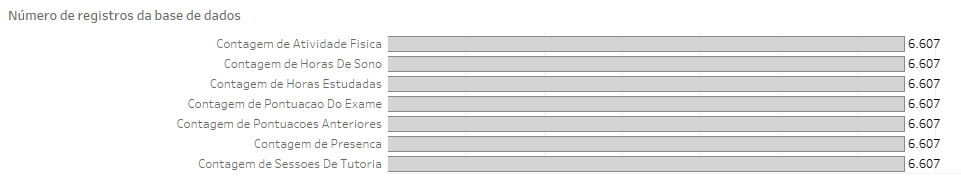



Para cada atributo categórico foi construído um gráfico de barras horizontais. O comprimento da barra representa a contagem de respostas para cada opção de resposta, o rótulo foi acrescentado para facilitar a compreensão dos valores, para isso utilizei a ferramenta *Tableau Public Desktop*.

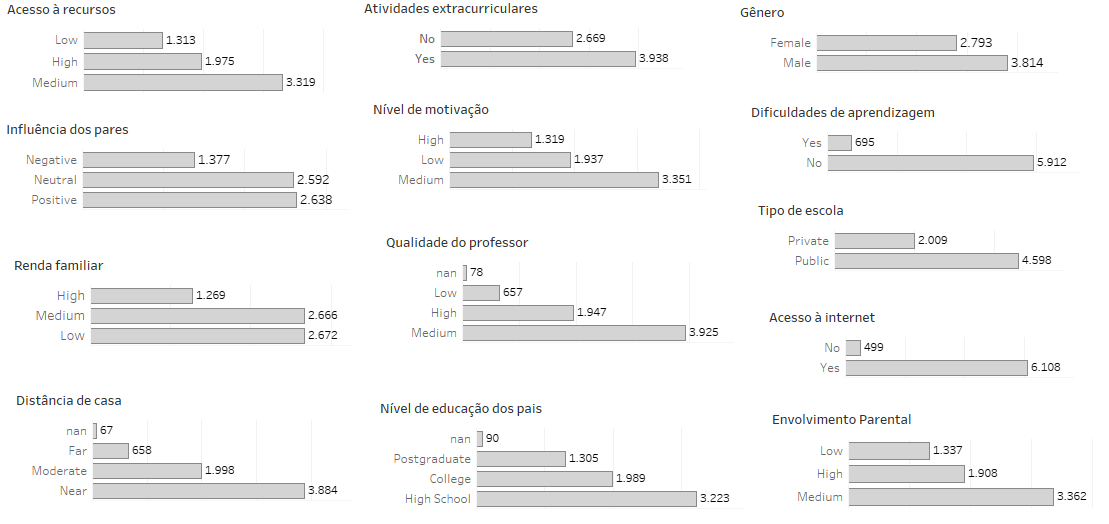

A partir da análise dos gráficos foi constatado que:
- os campos `Distância de casa`, `Nível de educação dos pais` e `Qualidade do professor` possuem valores ausentes;
- os campos `Dificuldade de aprendizagem` e `Acesso a internet`apresentam o desbalanceamento das respostas.

No histograma podemos observar a quantidade de estudantes para cada `pontuacao_do_exame`.
Para construção do histograma o atributo `pontuacao_do_exame` foi utilizado como atributo numérico no eixo vertical e como atributo categórico no eixo horizontal. A contagem de estudantes para cada nota está representada no comprimento da barra e no rótulo.
Utilizei o *Tableau Public Desktop*.

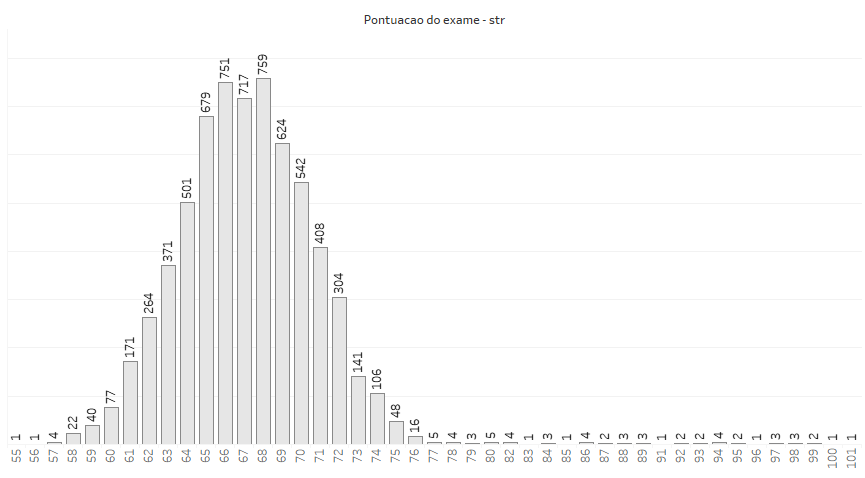

Nota-se no histograma que temos um estudante com pontuação 101, isso também foi identificado anteriormente.
A maioria das pontuações estão concentradas à esquerda do gráfico, o que demostra um resultado insatisfatório, tomando-se como premissa que a aprovação se dá quando a pontuação do exame é maior ou igual a 70.

Nos gráficos seguinte utilizaremos o scatterplot para avaliar agrupamentos de dados combinando  atributos:

<Axes: xlabel='pontuacoes_anteriores', ylabel='pontuacao_do_exame'>

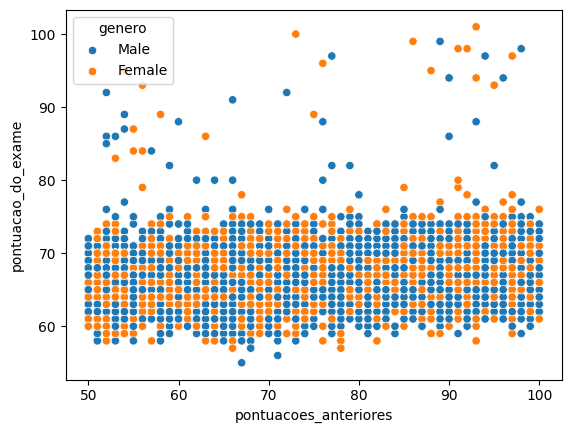

In [26]:
# Dispersão das pontuações anteriores versus pontuação do exame
# por gênero
sns.scatterplot(x='pontuacoes_anteriores', y='pontuacao_do_exame', hue='genero', data=df_novo)

<Axes: xlabel='horas_estudadas', ylabel='pontuacao_do_exame'>

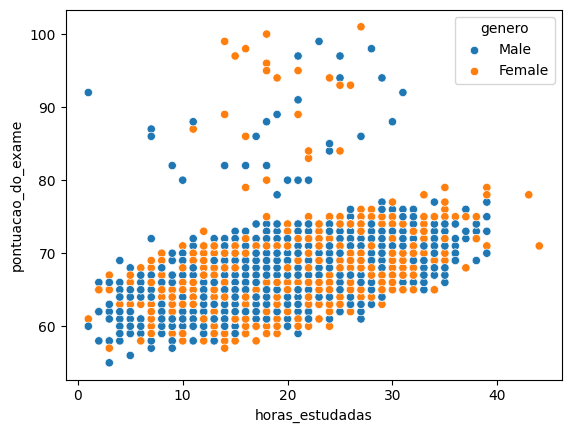

In [27]:
# Dispersão das horas estudadas versus pontuação do exame
# por gênero
sns.scatterplot(x='horas_estudadas', y='pontuacao_do_exame', hue='genero', data=df_novo)

No gráfico anterior, nota-se que os estudantes que tiveram as maiores pontuações (acima de 90) tiveram 30 horas de estudo ou menos.  

<Axes: xlabel='presenca', ylabel='pontuacao_do_exame'>

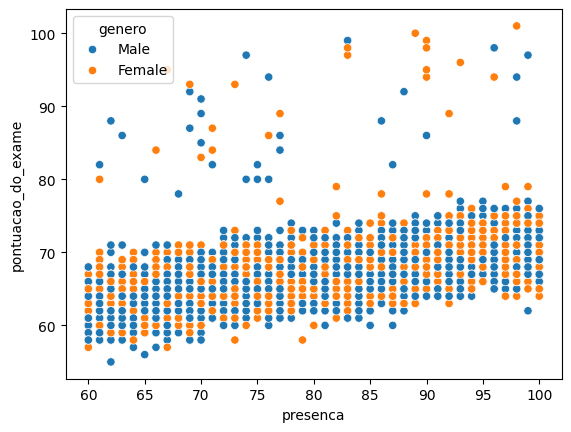

In [28]:
# # Dispersão da presença versus pontuação do exame
# por gênero
sns.scatterplot(x='presenca', y='pontuacao_do_exame', hue='genero', data=df_novo)

No gráfico acima, não é possível identificar um padrão em relação à presença e as pontuações do exame acima de 90.

Vamos explorar a média dos valores numéricos agrupados por `genero` em seguida por ` nivel de motivacao` e depois por `tipo_escola`:

In [29]:
# Médias por gênero
df_novo.groupby('genero').mean(numeric_only=True).round(2)

,horas_estudadas,presenca,horas_de_sono,sessoes_de_tutoria,atividade_fisica,pontuacoes_anteriores,pontuacao_do_exame
genero,,,,,,,
Female,20.01,79.87,7.04,1.50,2.96,75.05,67.24
Male,19.95,80.06,7.02,1.49,2.97,75.08,67.23


In [30]:
# Médias por nível de motivação
df_novo.groupby('nivel_de_motivacao').mean(numeric_only=True).round(2)

,horas_estudadas,presenca,horas_de_sono,sessoes_de_tutoria,atividade_fisica,pontuacoes_anteriores,pontuacao_do_exame
nivel_de_motivacao,,,,,,,
High,19.73,79.71,7.03,1.52,2.96,75.59,67.70
Low,19.96,79.93,7.03,1.50,2.98,75.20,66.75
Medium,20.08,80.11,7.03,1.48,2.96,74.79,67.33


In [31]:
# Médias por tipo de escola
df_novo.groupby('tipo_de_escola').mean(numeric_only=True).round(2)

,horas_estudadas,presenca,horas_de_sono,sessoes_de_tutoria,atividade_fisica,pontuacoes_anteriores,pontuacao_do_exame
tipo_de_escola,,,,,,,
Private,19.97,80.30,7.02,1.48,2.98,74.78,67.29
Public,19.98,79.84,7.03,1.50,2.96,75.20,67.21


Os resultados médios são muito similares. Então fiz o agrupamento por `renda_familiar`, `tipo_de_escola` e `genero` e os valores mantiveram-se bem próximos.

In [32]:
df_novo.groupby(['renda_familiar','tipo_de_escola','genero']).mean(numeric_only=True).round(2)

horas_estudadas  presenca  \
renda_familiar tipo_de_escola genero                              
High           Private        Female            19.42     79.57   
                              Male              19.77     80.32   
               Public         Female            19.99     79.86   
                              Male              20.04     79.87   
Low            Private        Female            20.20     80.09   
                              Male              19.84     80.35   
               Public         Female            19.98     79.63   
                              Male              19.85     80.62   
Medium         Private        Female            19.82     80.58   
                              Male              20.33     80.44   
               Public         Female            20.14     79.76   
                              Male              19.94     79.23   

                                      horas_de_sono  sessoes_de_tutoria  \
renda_familiar tipo_de_escola genero                                      
High           Private        Female           7.24                1.49   
                              Male             6.80                1.46   
               Public         Female           7.00                1.47   
                              Male             6.95                1.56   
Low            Private        Female           7.00                1.47   
                              Male             7.09                1.42   
               Public         Female           7.03                1.52   
                              Male             7.07                1.50   
Medium         Private        Female           7.05                1.54   
                              Male             6.99                1.51   
               Public         Female           7.05                1.51   
                              Male             7.03                1.46   

                                      atividade_fisica  pontuacoes_anteriores  \
renda_familiar tipo_de_escola genero                                            
High           Private        Female              2.81                  73.81   
                              Male                2.81                  74.02   
               Public         Female              2.84                  74.27   
                              Male                2.96                  75.33   
Low            Private        Female              3.08                  75.84   
                              Male                2.94                  74.98   
               Public         Female              2.94                  75.02   
                              Male                2.97                  75.23   
Medium         Private        Female              3.08                  74.85   
                              Male                3.03                  74.38   
               Public         Female              2.97                  75.44   
                              Male                3.01                  75.38   

                                      pontuacao_do_exame  
renda_familiar tipo_de_escola genero                      
High           Private        Female               67.64  
                              Male                 67.72  
               Public         Female               67.87  
                              Male                 67.94  
Low            Private        Female               67.04  
                              Male                 66.80  
               Public         Female               66.76  
                              Male                 66.87  
Medium         Private        Female               67.42  
                              Male                 67.56  
               Public         Female               67.36  
                              Male                 67.19

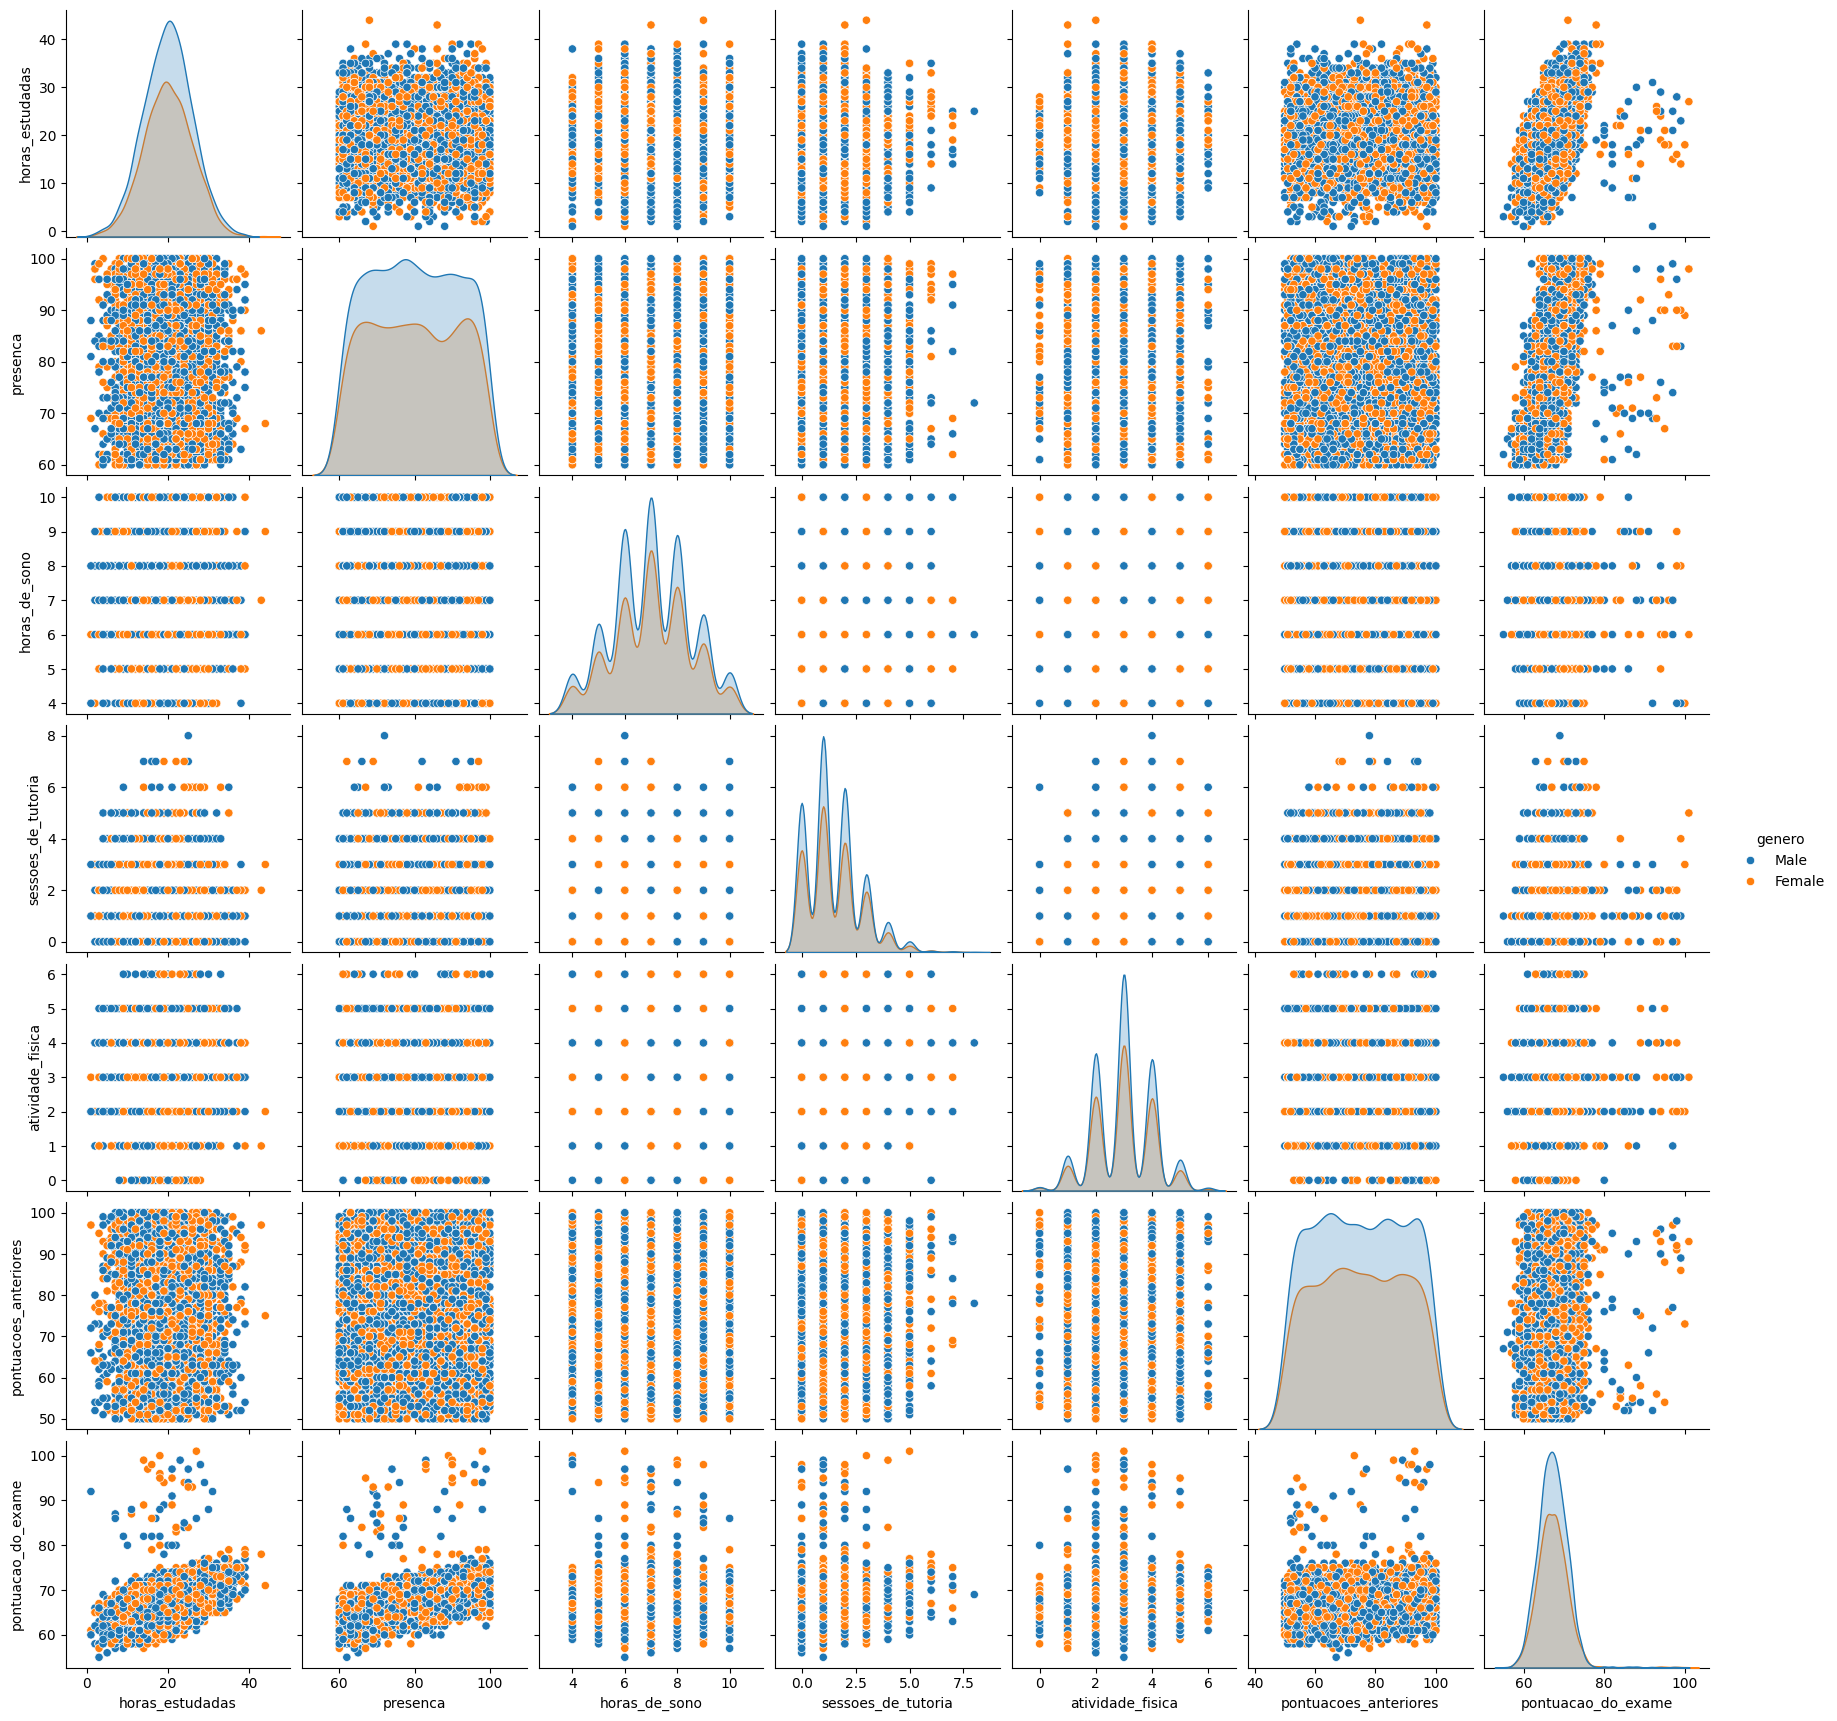

In [33]:
sns.pairplot(df_novo, hue = 'genero')

**Pré processamento dos dados**




Algumas transformações foram realizadas na etapa de análise de dados:

- ajuste de tipos de dados;
- exclusão de sujeira (linha 0 com valores incorretos).

**1)** Exclusão do registro com pontuação_do_exame = 101


In [34]:
# exclusão do registro com nota pontuacao_do_exame
# maior do que  100

excluir = df_novo[df_novo['pontuacao_do_exame'] > 100]
indice = excluir.index
df_novo.drop(indice, inplace = True)

Na operação anterior o registro com nota maior do que 100 é armazenado na variável excluir, em seguida identificamos o índice do registro e, por fim, eliminamos o registro do dataframe.

**2)** Tratamento dos registros com ausência de dados

Identificamos que os campos `Distância de casa`, `Nível de educação dos pais` e `Qualidade do professor` possuem valores ausentes.

In [35]:
# criando um subconjunto com os registros que possuem
# ausência de valores

dist_casa       = df_novo[df_novo['distancia_de_casa'].isnull()]
qual_prof       = df_novo[df_novo['qualidade_do_professor'].isnull()]
nivel_educ_pais = df_novo[df_novo['nivel_de_educacao_parental'].isnull()]

# armazendando os registros em um arquivo

df_reg_null = pd.concat([dist_casa, qual_prof, nivel_educ_pais])
df_reg_null.to_csv("https://raw.githubusercontent.com/sandragpuga/PUCRJ-MVP-analiseExploratoria/refs/heads/main/StudentPerformance_regNull.csv")


A seguir os campos sem valor receberão o valor 'não informado'.

In [36]:
# Substituição de nulos

df_novo['distancia_de_casa'].fillna('não informado', inplace=True)
df_novo['nivel_de_educacao_parental'].fillna('não informado', inplace=True)
df_novo['qualidade_do_professor'].fillna('não informado', inplace=True)

Não foram aplicados os métodos  one-hot encoding e dummy encoding.